# Setup

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/joshndala/phone-classification/refs/heads/main/cleaned_all_phones.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


# Initial Analysis

## Data Analysis

In [13]:
data['brand'].value_counts()

,count
brand,
Xiaomi,264
Oppo,213
Samsung,206
Vivo,168
Realme,157
Huawei,137
Honor,124
LG,75
OnePlus,47


In [14]:
data['battery_type'].value_counts()

,count
battery_type,
Li-Po,1242
Li-Ion,270


In [15]:
data.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [16]:
data['storage(GB)'].unique()

array([ 16,  32,  64,   8, 256, 128, 512,   1])

In [17]:
data[data['storage(GB)'] == 1]

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,2023-08-28,205.0,...,True,True,False,False,True,False,False,False,False,470.0


In [18]:
#change data to 1024GB (=1TB)
data.loc[data['storage(GB)'] == 1.0, 'storage(GB)'] = 1024.0

In [19]:
data[['width','height']] = data['resolution'].str.split('x', expand=True).astype('int64')

In [20]:
#Data Cleaning
# Label encode the 'brand' column
label_encoder = LabelEncoder()
data['brand_encoded'] = label_encoder.fit_transform(data['brand'])

#Separate year from date
data['announcement_year'] = data.announcement_date.apply(lambda x: x.split('-')[0]).astype('int64')

# Drop irrelevant columns (non-numerical and non-boolean)
cleaned_data = data.drop(columns=['phone_name', 'brand', 'os', 'resolution', 'battery_type', 'announcement_date'])

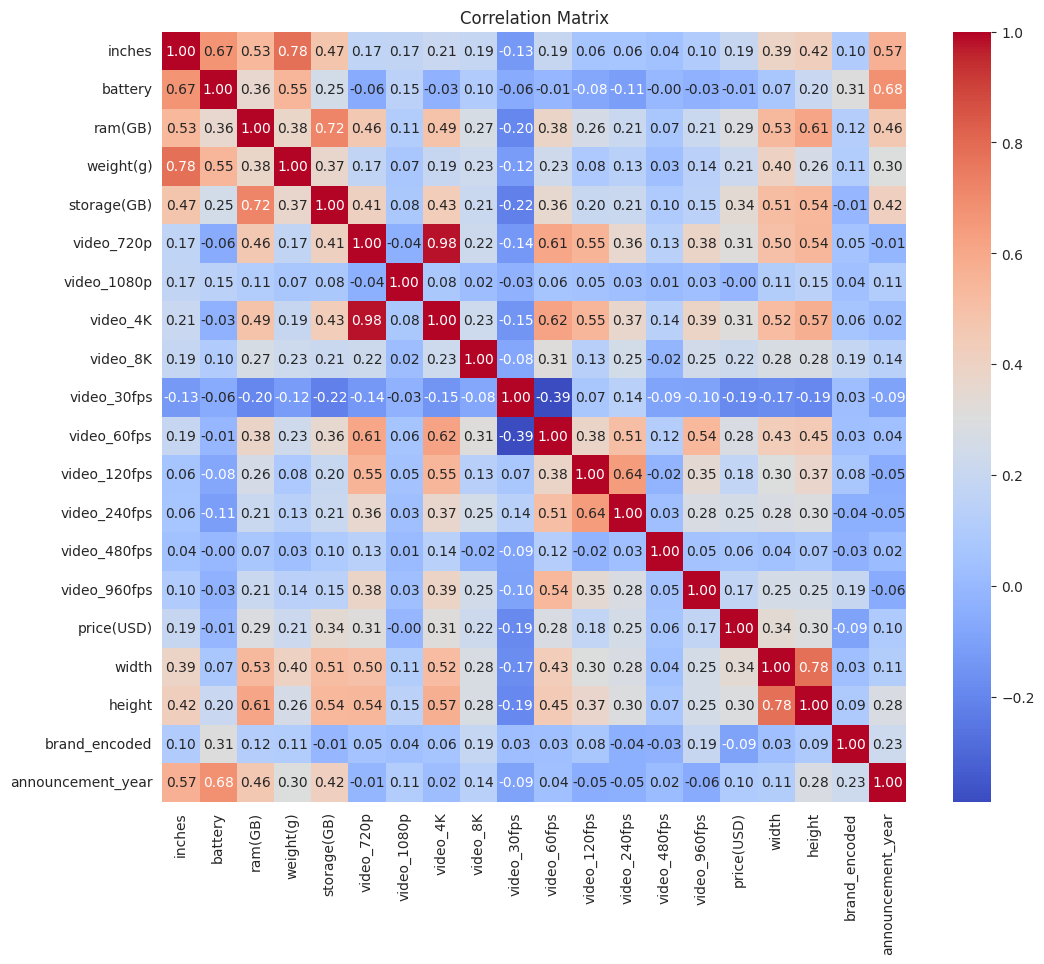

In [31]:
#correlation matrix
corr = cleaned_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The main target of this analysis will be pricing, and I'll be looking at different features that may affect pricing. With the correlation chart, it looks like there may not be many strong correlations directly with features, but the features have strong correlations with each other, which may be important.

<Figure size 1400x600 with 0 Axes>

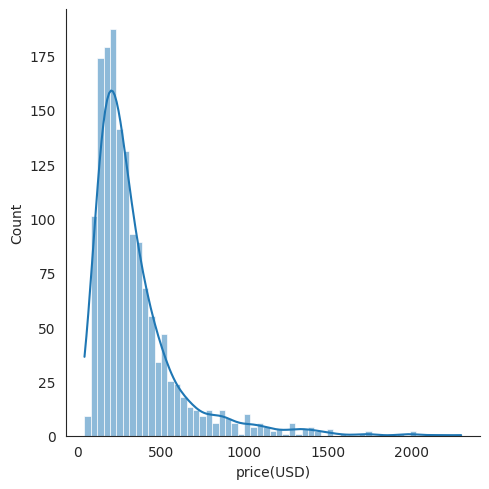

In [22]:
#prices
sns.set_style('white')
plt.figure(figsize = (14, 6))
sns.displot(data['price(USD)'], kde = True)
plt.show()

## Brand

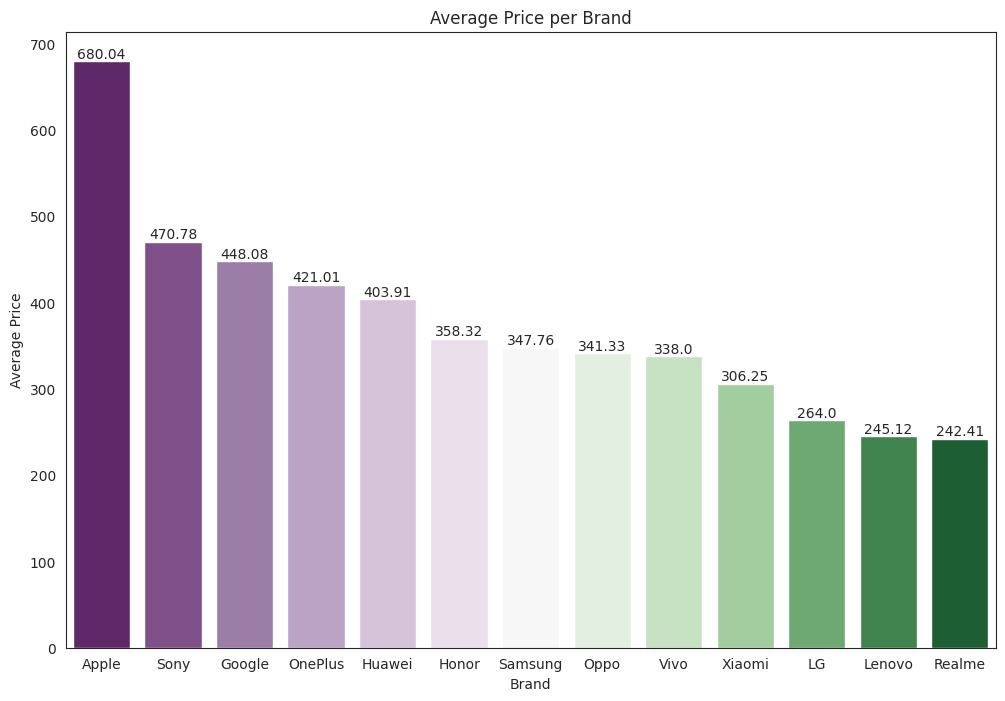

In [23]:
#Price per brand
avg_prices = data.groupby('brand')['price(USD)'].mean().sort_values(ascending=False)
plt.figure(figsize = (12, 8))
sns.barplot(x=avg_prices.index, y=avg_prices.values, hue = avg_prices.index, palette='PRGn')
plt.title('Average Price per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')

#add numbers on top of each bar
for i, v in enumerate(avg_prices.values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

Text(0, 0.5, 'Number of Phones')

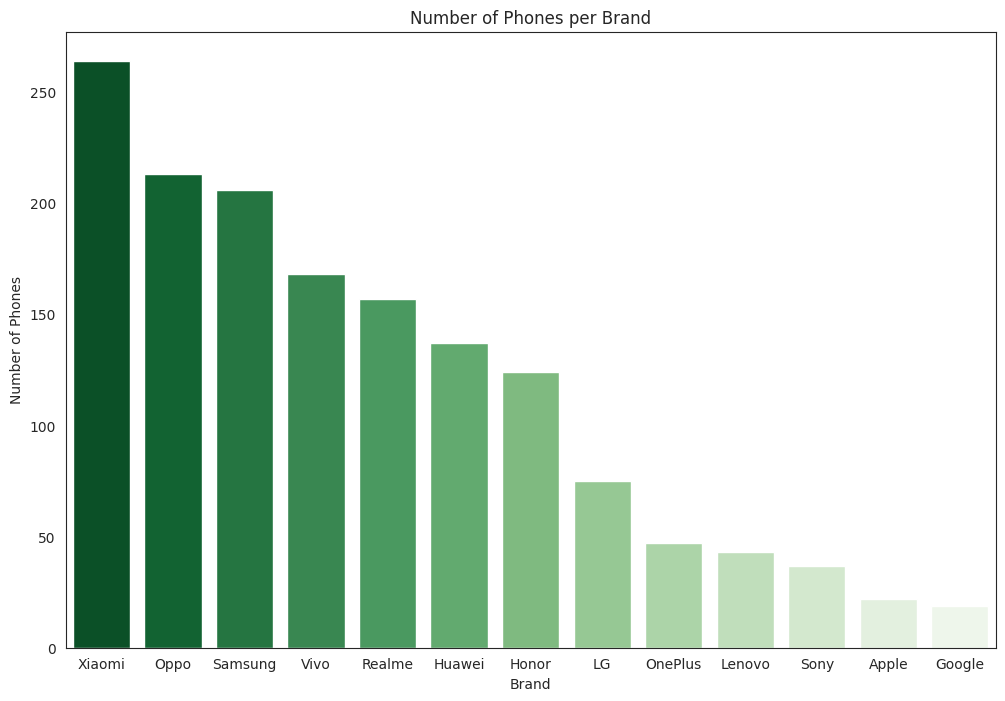

In [24]:
#Number of phones per brand
num_phones = data.groupby('brand')['phone_name'].count().sort_values(ascending=False)
plt.figure(figsize = (12, 8))
sns.barplot(x=num_phones.index, y=num_phones.values, hue = num_phones.index, palette='Greens_r')
plt.title('Number of Phones per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Phones')

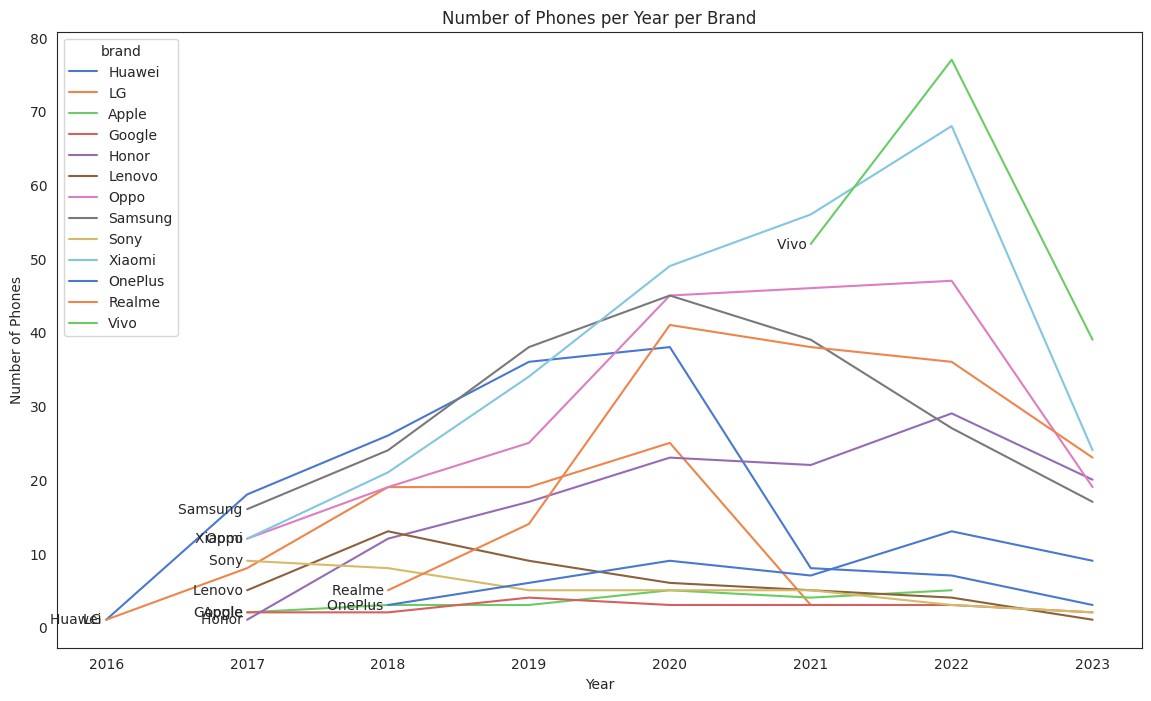

In [25]:
#Phones per year per brand
phones_per_year = data.groupby(['announcement_year', 'brand'])['phone_name'].count().reset_index()
plt.figure(figsize = (14, 8))
sns.lineplot(x='announcement_year', y='phone_name', hue='brand', data=phones_per_year, palette='muted')
plt.xlabel('Year')
plt.ylabel('Number of Phones')
plt.title('Number of Phones per Year per Brand')

#Name on each line
for brand in phones_per_year['brand'].unique():
    brand_data = phones_per_year[phones_per_year['brand'] == brand]
    first_point = brand_data.iloc[0]  # Changed from -1 to 0 to get first point
    plt.text(first_point['announcement_year'], first_point['phone_name'],
             f'{brand} ', ha='right', va='center')  # Changed ha to 'right'

plt.show()

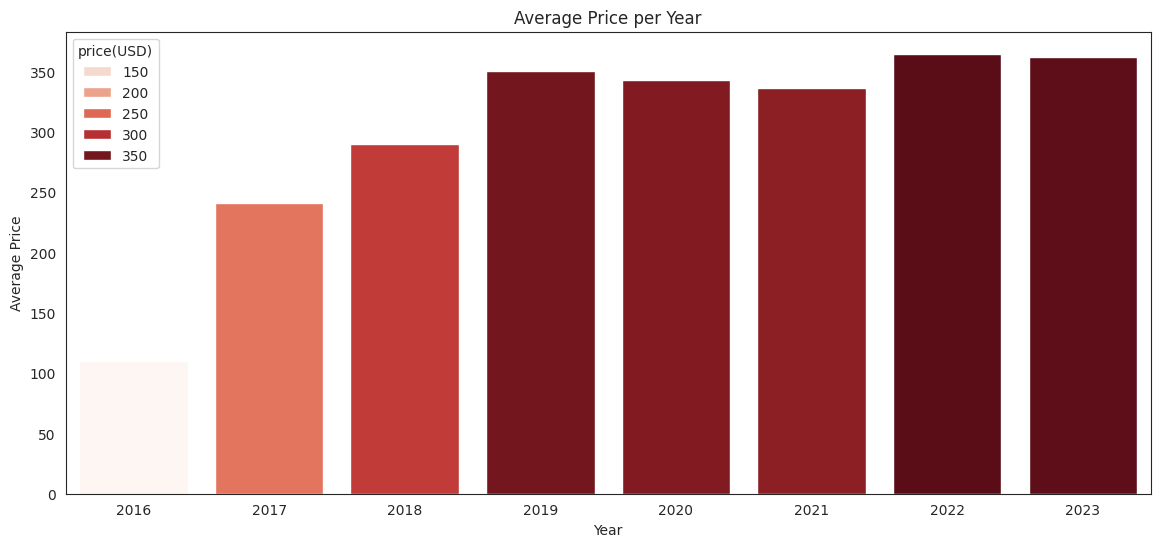

In [26]:
#Price changes over years
price_changes = data.groupby('announcement_year')['price(USD)'].mean().reset_index()
plt.figure(figsize = (14, 6))
sns.barplot(x='announcement_year', y='price(USD)', data=price_changes, hue='price(USD)', palette = 'Reds')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price per Year')
plt.show()

In [27]:
#Price Changes per Brand
prices_per_brand = data.pivot_table(index='announcement_year', columns='brand', values='price(USD)', aggfunc='mean')

prices_per_brand

brand,Apple,Google,Honor,Huawei,LG,Lenovo,OnePlus,Oppo,Realme,Samsung,Sony,Vivo,Xiaomi
announcement_year,,,,,,,,,,,,,
2016,NaN,NaN,NaN,120.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,245.000000,565.000000,190.000000,247.222222,160.000000,190.000000,NaN,279.166667,NaN,278.750000,213.111111,NaN,189.166667
2018,420.000000,355.000000,248.333333,346.538462,225.263158,186.153846,513.333333,362.736842,126.000000,255.416667,325.000000,NaN,306.666667
2019,440.556667,282.500000,268.235294,443.305556,255.263158,238.888889,646.416667,352.400000,223.285714,393.947368,414.000000,NaN,315.746471
2020,706.254000,316.000000,281.739130,432.571579,351.200000,185.000000,468.171111,328.390844,220.471415,396.656222,850.000000,NaN,272.719061
2021,952.427500,344.523333,370.909091,633.335000,170.000000,408.000000,382.512857,323.643043,238.710368,287.374103,639.798000,312.116115,339.939214
2022,909.634000,472.666667,490.167241,506.252857,NaN,392.500000,308.992923,334.267404,277.243611,340.444593,641.656667,364.609039,325.862706
2023,NaN,1072.000000,392.329000,249.666667,NaN,300.000000,384.551778,435.577895,270.040087,460.583412,728.500000,319.986359,285.300667


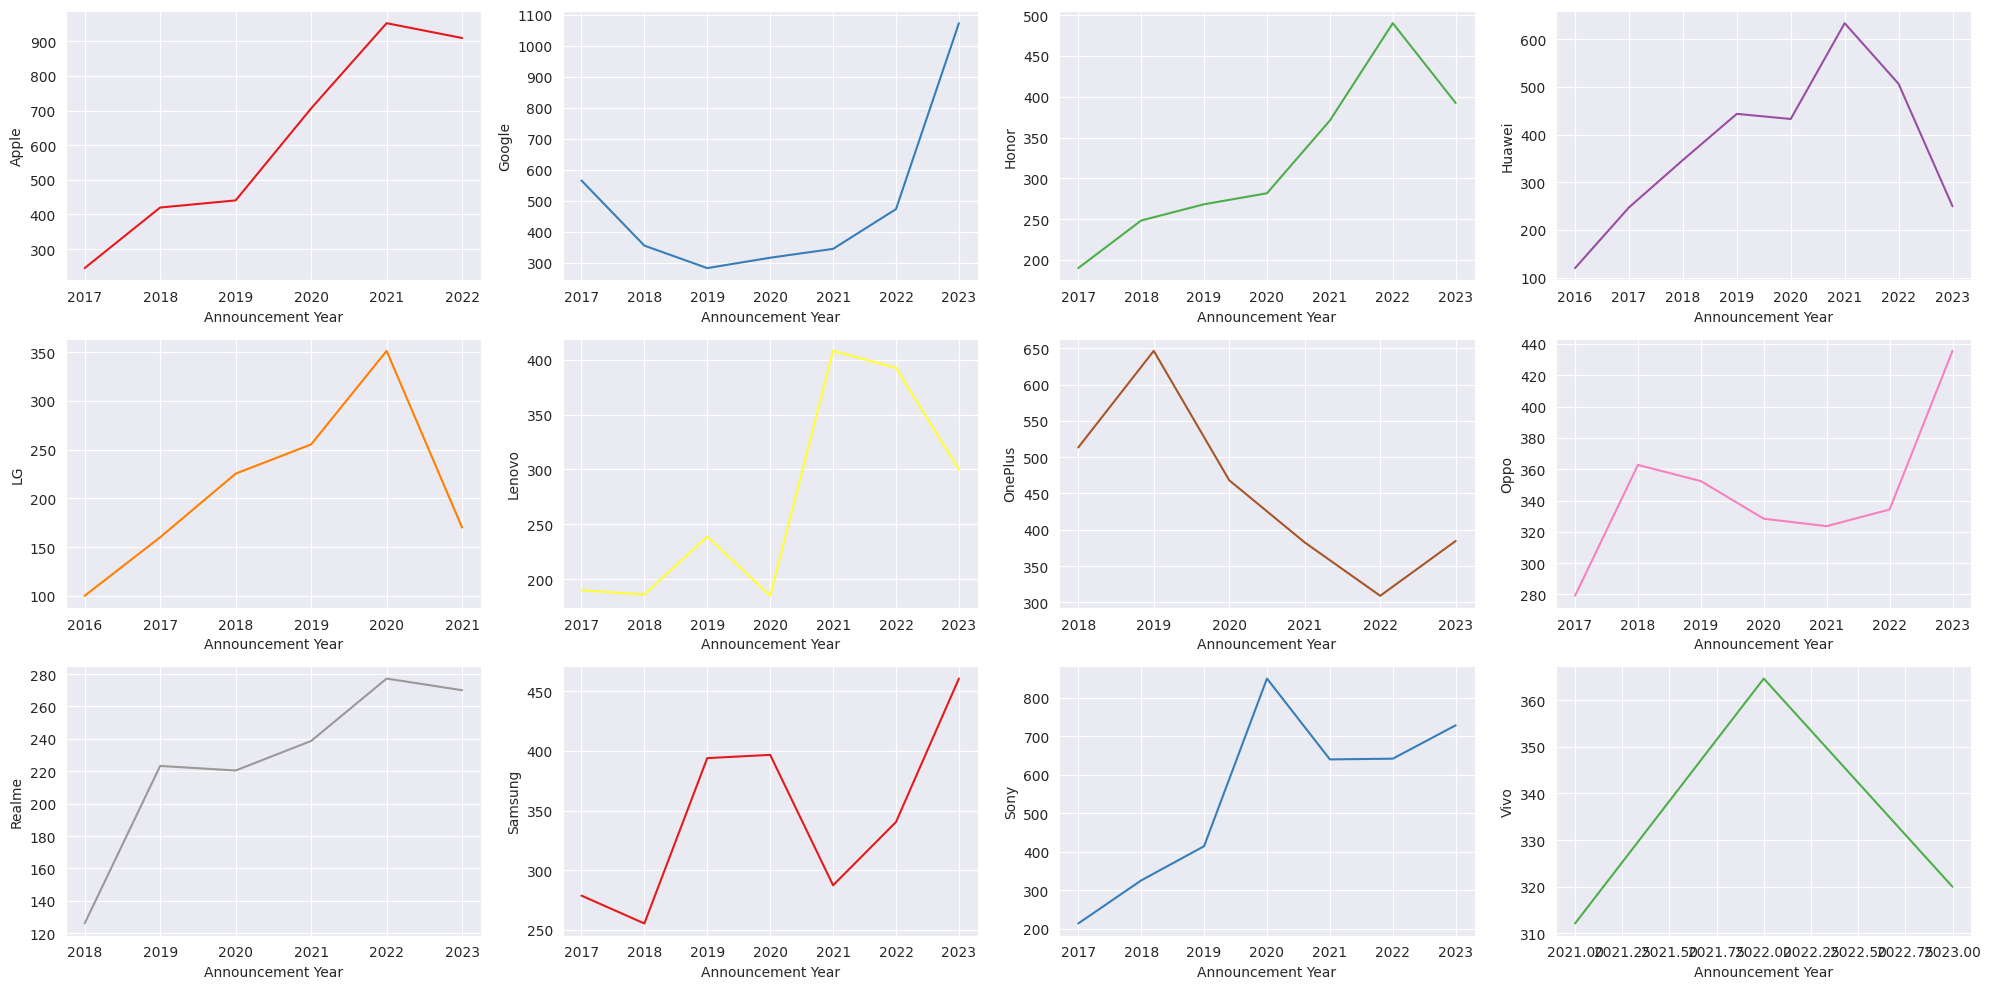

In [28]:
columns = prices_per_brand.columns
colors = sns.color_palette("Set1", n_colors=12)
sns.set_style('darkgrid')
fig, axs = plt.subplots(3, 4, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    ax.plot(prices_per_brand.index, prices_per_brand[columns[i]], color=colors[i % 12])
    ax.set(xlabel="Announcement Year", ylabel=columns[i])

plt.tight_layout()
plt.show()

## Storage and RAM

Focusing on pricing, there's some correlation between price and storage. So then when looking at storage, there's a significant correlation between storage and RAM

Text(0, 0.5, 'RAM (GB)')

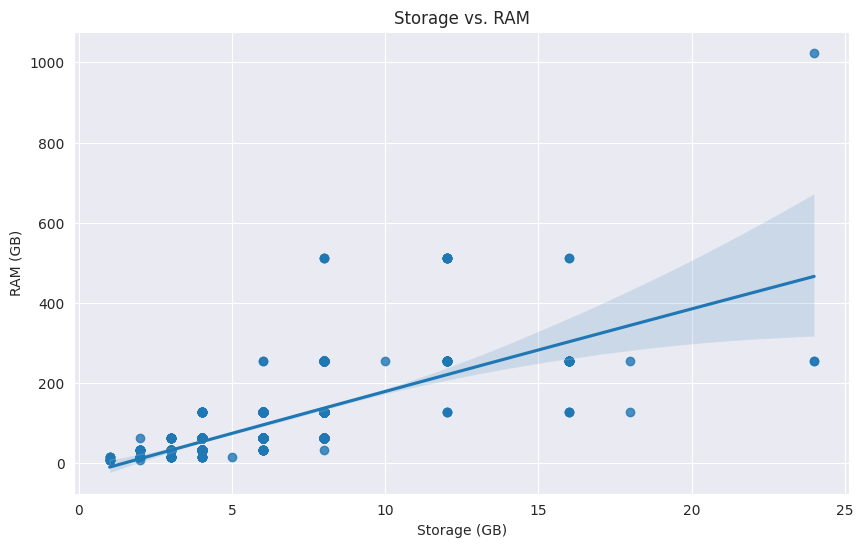

In [29]:
#Storage vs. RAM
plt.figure(figsize=(10, 6))
sns.regplot(x='ram(GB)', y='storage(GB)', order = 2, data=cleaned_data)
plt.title('Storage vs. RAM')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')

## Weight and Inches

Another correlation with pricing is weight, although weight itself has a very significant correlation with inches

<Figure size 1200x600 with 0 Axes>

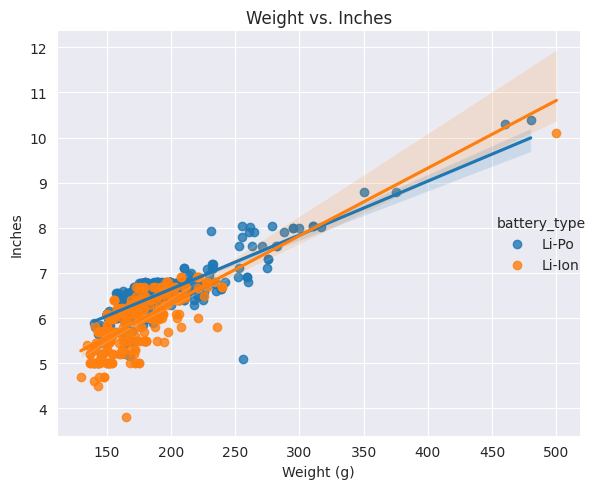

In [30]:
#Weight vs. Inches
plt.figure(figsize=(12, 6))
sns.lmplot(x='weight(g)', y='inches', hue = 'battery_type', data=data)
plt.title('Weight vs. Inches')
plt.xlabel('Weight (g)')
plt.ylabel('Inches')
plt.tight_layout()

plt.show()

# Additional Feature Engineering

In [32]:
#Screen and Resolution Features
cleaned_data['screen_area'] = cleaned_data['width'] * cleaned_data['height']
cleaned_data['pixel_density'] = cleaned_data['screen_area'] / (cleaned_data['inches'] ** 2)

In [33]:
#Video quality score
video_res_weights = {
    'video_720p': 1,
    'video_1080p': 2,
    'video_4K': 4,
    'video_8K': 8
}

video_fps_weights = {
    'video_30fps': 1,
    'video_60fps': 2,
    'video_120fps': 3,
    'video_240fps': 4,
    'video_480fps': 5,
    'video_960fps': 6
}

cleaned_data['video_res_score'] = sum(cleaned_data[col] * video_res_weights[col]
                                    for col in video_res_weights.keys())
cleaned_data['video_fps_score'] = sum(cleaned_data[col] * video_fps_weights[col]
                                    for col in video_fps_weights.keys())
cleaned_data['video_total_score'] = cleaned_data['video_res_score'] * cleaned_data['video_fps_score']

In [34]:
#Memory and Storage Interactions
cleaned_data['memory_ratio'] = cleaned_data['ram(GB)'] / cleaned_data['storage(GB)']
cleaned_data['memory_total'] = cleaned_data['ram(GB)'] + cleaned_data['storage(GB)']

#Device Age and Generation Features
cleaned_data['device_age'] = 2024 - cleaned_data['announcement_year']

#Create price segments (can be useful for analysis)
cleaned_data['price_segment'] = pd.qcut(cleaned_data['price(USD)'],
                                      q=5,
                                      labels=['budget', 'low_mid', 'mid', 'high_mid', 'premium'])

In [35]:
#Phone Specs Score
cleaned_data['specs_score'] = (
    cleaned_data['ram(GB)'] * 0.3 +
    np.log1p(cleaned_data['storage(GB)']) * 0.2 +
    cleaned_data['video_total_score'] * 0.2 +
    cleaned_data['battery'] / 1000 * 0.15 +
    cleaned_data['screen_area'] / 100000 * 0.15
)

In [36]:
#Feature Interactions
cleaned_data['ram_storage_interaction'] = cleaned_data['ram(GB)'] * np.log1p(cleaned_data['storage(GB)'])
cleaned_data['screen_battery_ratio'] = cleaned_data['screen_area'] / cleaned_data['battery']

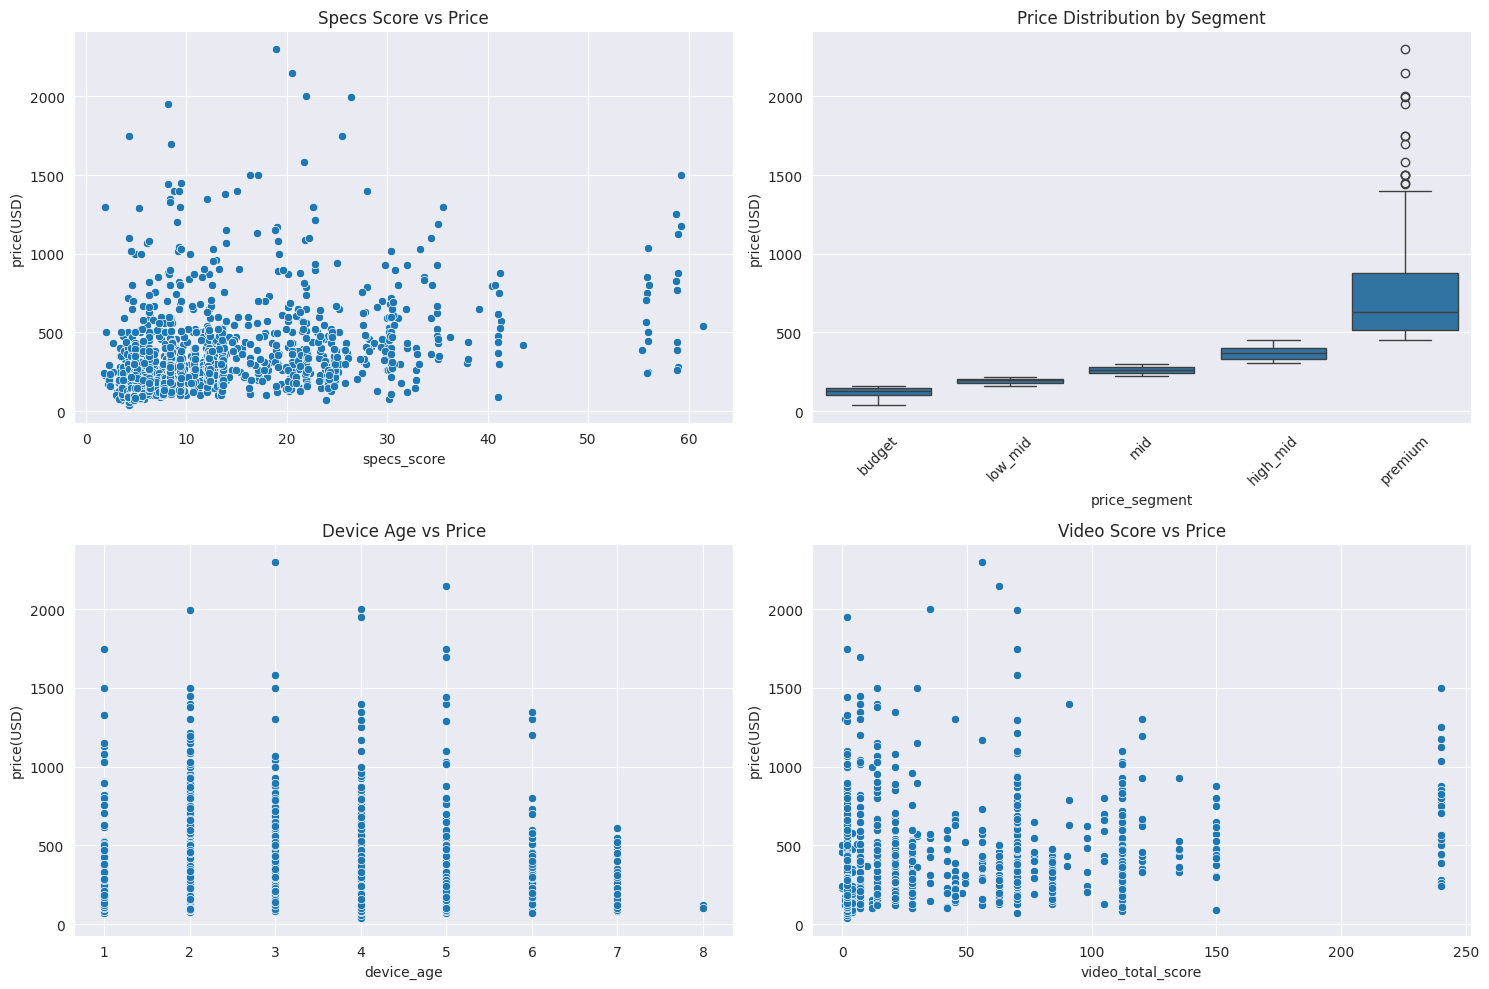

In [37]:
# Visualize the relationship between new features and price
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data=cleaned_data, x='specs_score', y='price(USD)')
plt.title('Specs Score vs Price')

plt.subplot(2, 2, 2)
sns.boxplot(data=cleaned_data, x='price_segment', y='price(USD)')
plt.title('Price Distribution by Segment')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.scatterplot(data=cleaned_data, x='device_age', y='price(USD)')
plt.title('Device Age vs Price')

plt.subplot(2, 2, 4)
sns.scatterplot(data=cleaned_data, x='video_total_score', y='price(USD)')
plt.title('Video Score vs Price')

plt.tight_layout()
plt.show()

In [38]:
# Check correlation of new features with price
new_features_corr = cleaned_data[[
    'price(USD)', 'specs_score', 'video_total_score',
    'memory_ratio', 'memory_total', 'screen_area',
    'pixel_density', 'device_age'
]].corr()['price(USD)'].sort_values(ascending=False)

print("\nCorrelation with price for new features:")
print(new_features_corr)


Correlation with price for new features:
price(USD)           1.000000
screen_area          0.353292
specs_score          0.348521
memory_total         0.343766
video_total_score    0.304869
pixel_density        0.280889
device_age          -0.098191
memory_ratio        -0.239630
Name: price(USD), dtype: float64


In [39]:
#Normalized features (helpful for modeling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Normalize numerical features
numerical_cols = ['battery', 'ram(GB)', 'storage(GB)', 'weight(g)', 'inches']
for col in numerical_cols:
    cleaned_data[f'{col}_normalized'] = scaler.fit_transform(cleaned_data[[col]])

In [40]:
#Premium features indicator
cleaned_data['is_premium_storage'] = cleaned_data['storage(GB)'] >= 256
cleaned_data['is_premium_ram'] = cleaned_data['ram(GB)'] >= 8

#More sophisticated battery features
cleaned_data['battery_per_inch'] = cleaned_data['battery'] / cleaned_data['inches']
cleaned_data['battery_per_weight'] = cleaned_data['battery'] / cleaned_data['weight(g)']

#Generation indicators
cleaned_data['is_recent_gen'] = cleaned_data['device_age'] <= 2
cleaned_data['generation_score'] = np.exp(-cleaned_data['device_age'] * 0.5)  # Exponential decay

#Screen-to-body approximation
cleaned_data['screen_to_weight_ratio'] = cleaned_data['screen_area'] / cleaned_data['weight(g)']

In [41]:
#Composite feature scores
cleaned_data['performance_score'] = (
    cleaned_data['ram(GB)_normalized'] * 0.4 +
    cleaned_data['storage(GB)_normalized'] * 0.3 +
    cleaned_data['generation_score'] * 0.3
)

cleaned_data['display_score'] = (
    cleaned_data['pixel_density'] * 0.4 +
    cleaned_data['inches_normalized'] * 0.3 +
    cleaned_data['video_total_score'] / cleaned_data['video_total_score'].max() * 0.3
)

#Brand market positioning
brand_avg_price = cleaned_data.groupby('brand_encoded')['price(USD)'].transform('mean')
cleaned_data['price_vs_brand_avg'] = cleaned_data['price(USD)'] / brand_avg_price

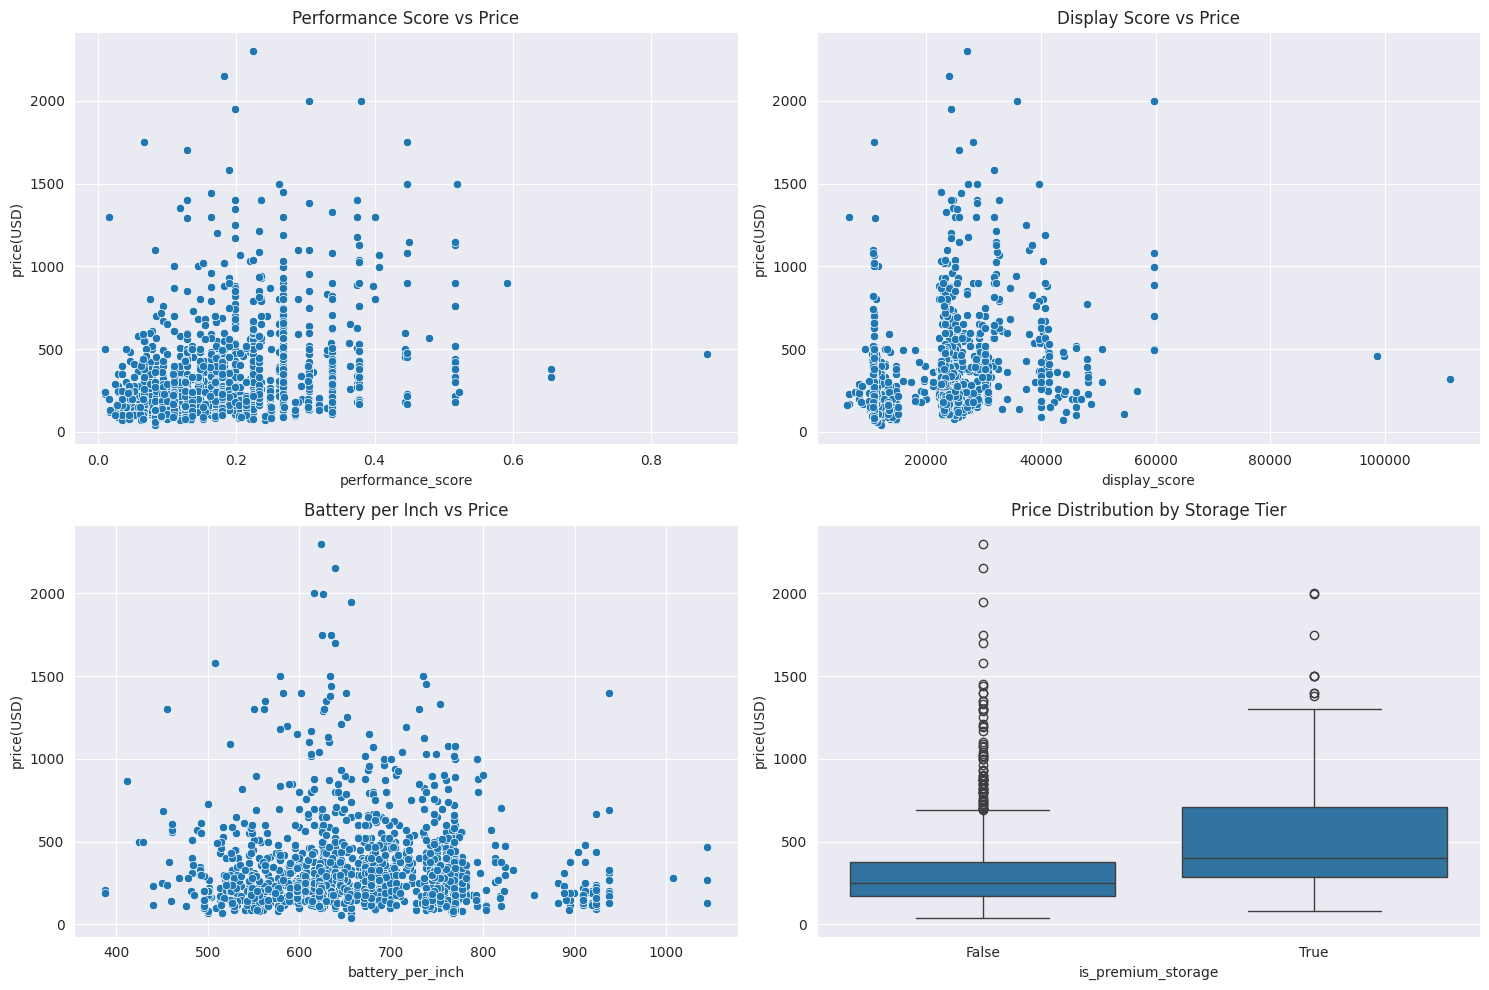

In [42]:
#Visualize new feature relationships
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=cleaned_data, x='performance_score', y='price(USD)')
plt.title('Performance Score vs Price')

plt.subplot(2, 2, 2)
sns.scatterplot(data=cleaned_data, x='display_score', y='price(USD)')
plt.title('Display Score vs Price')

plt.subplot(2, 2, 3)
sns.scatterplot(data=cleaned_data, x='battery_per_inch', y='price(USD)')
plt.title('Battery per Inch vs Price')

plt.subplot(2, 2, 4)
sns.boxplot(data=cleaned_data, x='is_premium_storage', y='price(USD)')
plt.title('Price Distribution by Storage Tier')

plt.tight_layout()
plt.show()

In [43]:
# Check correlations with price for new features
new_features = [
    'performance_score', 'display_score', 'battery_per_inch',
    'battery_per_weight', 'screen_to_weight_ratio', 'price_vs_brand_avg',
    'generation_score'
]

correlations = cleaned_data[['price(USD)'] + new_features].corr()['price(USD)'].sort_values(ascending=False)
print("\nCorrelations with price for new features:")
print(correlations)


Correlations with price for new features:
price(USD)                1.000000
price_vs_brand_avg        0.952671
display_score             0.280891
screen_to_weight_ratio    0.278663
performance_score         0.256359
generation_score          0.075461
battery_per_inch         -0.098382
battery_per_weight       -0.177423
Name: price(USD), dtype: float64


# Models

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

#Prepare features and target
#Drop non-feature columns and categorical columns we don't want to use
X = cleaned_data.drop(['price(USD)', 'price_segment'], axis=1)
y = cleaned_data['price(USD)']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
#Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Results:")
    print(f"RMSE: ${rmse:.2f}")
    print(f"MAE: ${mae:.2f}")
    print(f"R² Score: {r2:.3f}")
    return rmse, mae, r2

In [50]:
# 1. Linear Regression (Baseline)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_metrics = evaluate_model(y_test, lr_pred, "Linear Regression")

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_metrics = evaluate_model(y_test, rf_pred, "Random Forest")

# 3. XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_metrics = evaluate_model(y_test, xgb_pred, "XGBoost")


Linear Regression Results:
RMSE: $75.99
MAE: $47.69
R² Score: 0.918

Random Forest Results:
RMSE: $68.84
MAE: $34.72
R² Score: 0.933

XGBoost Results:
RMSE: $51.30
MAE: $21.80
R² Score: 0.963


In [51]:
#Cross-validation scores for all models
cv_scores = {
    'Linear Regression': cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='r2'),
    'Random Forest': cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2'),
    'XGBoost': cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='r2')
}

print("\nCross-validation R² scores (mean ± std):")
for model_name, scores in cv_scores.items():
    print(f"{model_name}: {scores.mean():.3f} ± {scores.std():.3f}")


Cross-validation R² scores (mean ± std):
Linear Regression: 0.925 ± 0.006
Random Forest: 0.937 ± 0.013
XGBoost: 0.961 ± 0.012


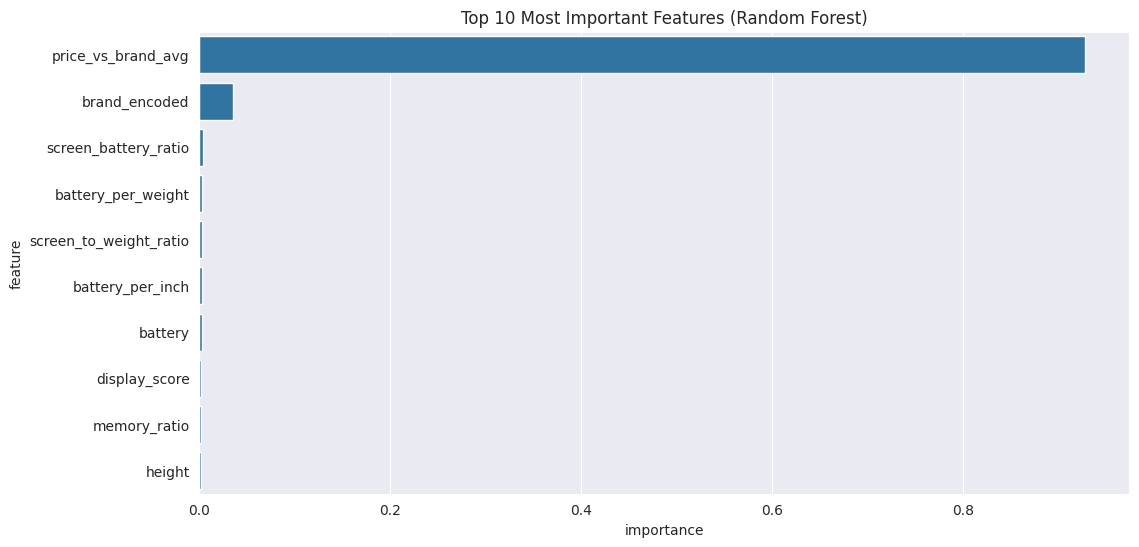

In [52]:
#Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features (Random Forest)')
plt.show()

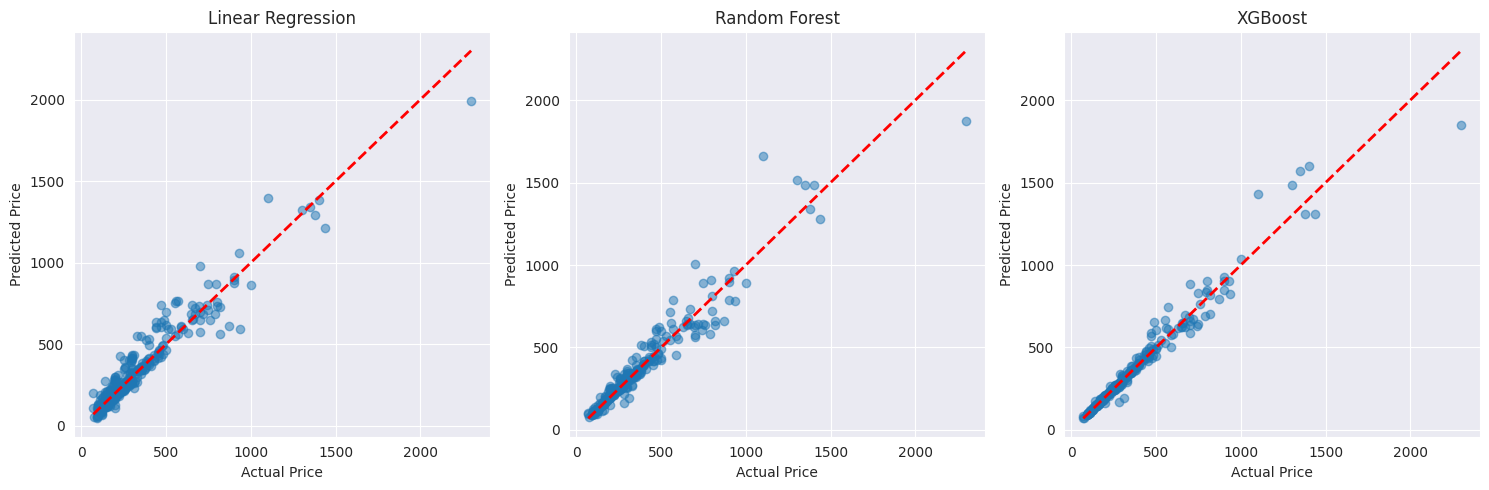

In [53]:
#Scatter plot of predictions vs actual
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')

plt.subplot(132)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest')

plt.subplot(133)
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost')

plt.tight_layout()
plt.show()

## Models with less important features


Linear Regression Results (Streamlined Features):
RMSE: $78.08
MAE: $48.70
R² Score: 0.913
CV R² Score: 0.922 ± 0.009

Random Forest Results (Streamlined Features):
RMSE: $66.44
MAE: $32.39
R² Score: 0.937
CV R² Score: 0.942 ± 0.012

XGBoost Results (Streamlined Features):
RMSE: $40.78
MAE: $17.74
R² Score: 0.976
CV R² Score: 0.961 ± 0.015


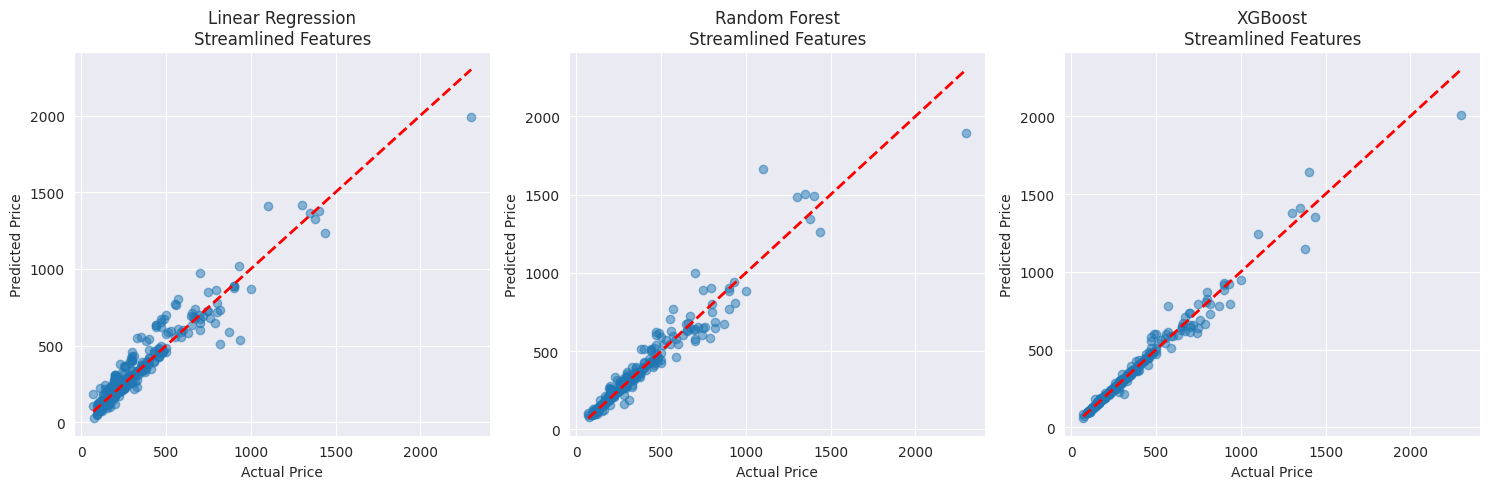

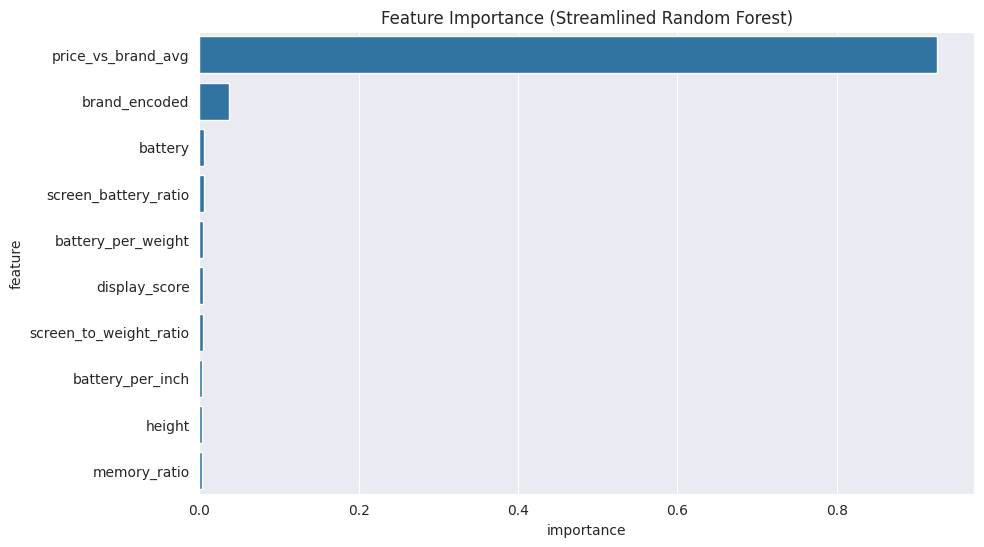


Comparison with Original Models:

Linear Regression:
Original CV R²: 0.925
Streamlined CV R²: 0.922
Difference: -0.003

Random Forest:
Original CV R²: 0.937
Streamlined CV R²: 0.942
Difference: +0.005

XGBoost:
Original CV R²: 0.961
Streamlined CV R²: 0.961
Difference: +0.000


In [57]:
#Top features based on importance
important_features = [
    'price_vs_brand_avg',
    'brand_encoded',
    'screen_battery_ratio',
    'battery_per_weight',
    'screen_to_weight_ratio',
    'battery_per_inch',
    'battery',
    'display_score',
    'memory_ratio',
    'height'
]

#New Dataset
X_slim = cleaned_data[important_features]
y = cleaned_data['price(USD)']

#Split/Scale
X_train_slim, X_test_slim, y_train, y_test = train_test_split(X_slim, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_slim_scaled = scaler.fit_transform(X_train_slim)
X_test_slim_scaled = scaler.transform(X_test_slim)

#Train and evaluate streamlined models
def train_and_evaluate(X_train, X_test, y_train, y_test, model_name):
    if model_name == "Linear Regression":
        model = LinearRegression()
    elif model_name == "Random Forest":
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    else:  # XGBoost
        model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    print(f"\n{model_name} Results (Streamlined Features):")
    print(f"RMSE: ${rmse:.2f}")
    print(f"MAE: ${mae:.2f}")
    print(f"R² Score: {r2:.3f}")
    print(f"CV R² Score: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

    return model, y_pred, cv_scores

# Train and evaluate all models
models = ["Linear Regression", "Random Forest", "XGBoost"]
results = {}

for model_name in models:
    model, predictions, cv_scores = train_and_evaluate(
        X_train_slim_scaled,
        X_test_slim_scaled,
        y_train,
        y_test,
        model_name
    )
    results[model_name] = {
        'model': model,
        'predictions': predictions,
        'cv_scores': cv_scores
    }

# Visualize predictions vs actual for all models
plt.figure(figsize=(15, 5))
for i, (model_name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, result['predictions'], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name}\nStreamlined Features')

plt.tight_layout()
plt.show()

# Compare feature importance for Random Forest (streamlined vs original)
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': important_features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Streamlined Random Forest)')
plt.show()

# Print improvement/degradation comparison
print("\nComparison with Original Models:")
for model_name in models:
    original_cv = {
        "Linear Regression": 0.925,
        "Random Forest": 0.937,
        "XGBoost": 0.961
    }
    new_cv = results[model_name]['cv_scores'].mean()
    diff = new_cv - original_cv[model_name]
    print(f"\n{model_name}:")
    print(f"Original CV R²: {original_cv[model_name]:.3f}")
    print(f"Streamlined CV R²: {new_cv:.3f}")
    print(f"Difference: {diff:+.3f}")

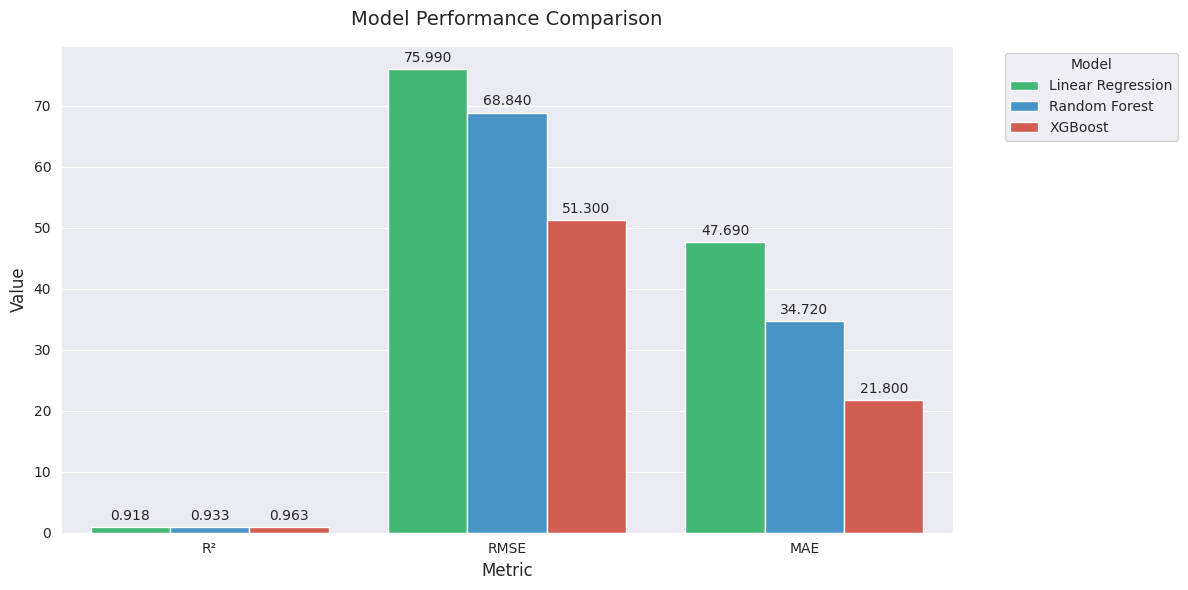


Metrics Table:
Metric               MAE   RMSE     R²
Model                                 
Linear Regression  47.69  75.99  0.918
Random Forest      34.72  68.84  0.933
XGBoost            21.80  51.30  0.963


In [58]:
# Create dictionary of metrics
metrics_data = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'] * 3,
    'Metric': ['R²', 'R²', 'R²', 'RMSE', 'RMSE', 'RMSE', 'MAE', 'MAE', 'MAE'],
    'Value': [
        # R² scores
        0.918, 0.933, 0.963,
        # RMSE values
        75.99, 68.84, 51.30,
        # MAE values
        47.69, 34.72, 21.80
    ]
}

# Create DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Create grouped bar chart
plt.figure(figsize=(12, 6))


# Define colors for each model
colors = ['#2ecc71', '#3498db', '#e74c3c']

# Create grouped bar chart
g = sns.barplot(
    data=df_metrics,
    x='Metric',
    y='Value',
    hue='Model',
    palette=colors
)

# Customize the plot
plt.title('Model Performance Comparison', fontsize=14, pad=15)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Rotate x-labels if needed
plt.xticks(rotation=0)

# Add value labels on the bars
for container in g.containers:
    g.bar_label(container, fmt='%.3f', padding=3)

# Adjust legend
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Optional: Create a table version of the metrics
metrics_table = df_metrics.pivot(index='Model', columns='Metric', values='Value')
print("\nMetrics Table:")
print(metrics_table.round(3))